There are two types of uncertainties faced in inventory management.            
1. Uncertainty in Customer Demand
2. Uncertainty in Lead Time.

Preparing the data

In [ ]:
pip install inventorize3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import inventorize3 as inv
import datetime as dt

In [ ]:
retail_df = pd.read_csv("online_retail.csv")
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
retail_df.drop_duplicates(inplace = True)
retail_df.dropna(axis = 0, inplace = True)

In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58002 entries, 0 to 82651
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      58002 non-null  object 
 1   StockCode    58002 non-null  object 
 2   Description  58002 non-null  object 
 3   Quantity     58002 non-null  int64  
 4   InvoiceDate  58002 non-null  object 
 5   Price        58002 non-null  float64
 6   Customer ID  58002 non-null  float64
 7   Country      58002 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 4.0+ MB


Converting the InvoiceDate to datetime format

In [ ]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])
retail_df["InvoiceDate"] = retail_df["InvoiceDate"].dt.strftime("%Y-%m-%d")
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])
retail_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom


In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58002 entries, 0 to 82651
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Invoice      58002 non-null  object        
 1   StockCode    58002 non-null  object        
 2   Description  58002 non-null  object        
 3   Quantity     58002 non-null  int64         
 4   InvoiceDate  58002 non-null  datetime64[ns]
 5   Price        58002 non-null  float64       
 6   Customer ID  58002 non-null  float64       
 7   Country      58002 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.0+ MB


Case 1: In this scenario we will only consider the variability in Customer Demand. We will neglect the uncertainty in Lead Time.





In [ ]:
max(retail_df.InvoiceDate)

Timestamp('2010-02-05 00:00:00')

In [ ]:
last_four = retail_df[retail_df["InvoiceDate"] > "2009-08-09"]
last_four.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom


In [ ]:
last_four["Revenue"] = last_four["Quantity"] * last_four["Price"]
last_four.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085.0,United Kingdom,30.0


In [ ]:
grouped_retail = last_four.groupby(["Description", "InvoiceDate"]).agg(total_daily = ("Quantity", np.sum), total_revenue = ("Revenue", np.sum)).reset_index()
grouped_retail.head()

,Description,InvoiceDate,total_daily,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,2010-01-05,1,6.75
1,DOORMAT UNION JACK GUNS AND ROSES,2010-01-08,12,73.00
2,DOORMAT UNION JACK GUNS AND ROSES,2010-01-10,3,20.25
3,DOORMAT UNION JACK GUNS AND ROSES,2010-01-11,15,93.25
4,DOORMAT UNION JACK GUNS AND ROSES,2010-01-12,1,6.75


In [ ]:
retail_df = grouped_retail.groupby("Description").agg(mean = ("total_daily" , np.mean), std = ("total_daily", "std"), total_sales = ("total_daily", np.sum), total_revenue = ("total_revenue", np.sum)).reset_index()
retail_df.head()

,Description,mean,std,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,7.550000,8.375874,151,971.25
1,3 STRIPEY MICE FELTCRAFT,12.724138,17.651177,369,693.75
2,ANIMAL STICKERS,33.700000,12.311241,337,70.77
3,BLACK PIRATE TREASURE CHEST,5.000000,3.391165,45,74.25
4,BROWN PIRATE TREASURE CHEST,6.000000,4.000000,36,59.40


Now we will do ABC analysis so as to categorize the products which will drive the service level while calculating the safety stock and reorder point.             
ABC Categorization based on sales and revenue

In [ ]:
for_abc = inv.productmix(retail_df["Description"],retail_df["total_sales"], retail_df["total_revenue"] )

In [ ]:
for_abc.product_mix.value_counts()

C_C    1471
A_A     471
B_B     354
C_B     226
B_A     181
A_B     181
B_C     152
C_A      42
A_C      20
Name: product_mix, dtype: int64

**Reorder Point:** The level/point of inventory at which the order needs to be placed to the supplier so as to ensure smooth operations of the supply chain. This is equivalent to the summation of Demand during the lead time and Safety Stock.

**Safety Stock.** The reserve stock of the SKU which can be used in case of under forecast of the demand.

In [ ]:
# Mapping the service level based on the category of the product
service_level = {"A_A": 0.95, "A_B": 0.95, "A_C": 0.95,
 "B_A": 0.75 , "B_B": 0.75, "B_C": 0.7,
 "C_A": 0.75, "C_B": 0.75, "C_C": 0.7,
 }

lead_time = 12

In [ ]:
for_abc["service_level"] = for_abc.product_mix.map(service_level)
for_abc.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,service_level
2961,WHITE HANGING HEART T-LIGHT HOLDER,12176,32272.86,0.015260,0.015260,0.025470,0.025470,A,A,A_A,0.95
873,EDWARDIAN PARASOL BLACK,3312,13178.40,0.004151,0.199131,0.010401,0.035871,A,A,A_A,0.95
1416,JUMBO BAG RED WHITE SPOTTY,7533,13110.15,0.009441,0.049668,0.010347,0.046217,A,A,A_A,0.95
876,EDWARDIAN PARASOL RED,2820,10701.00,0.003534,0.221632,0.008445,0.054663,A,A,A_A,0.95
169,ASSORTED COLOUR BIRD ORNAMENT,6330,10006.50,0.007933,0.082360,0.007897,0.062560,A,A,A_A,0.95


In [ ]:
service_level_df = for_abc[["skus", "service_level"]]
service_level_df.head()

,skus,service_level
2961,WHITE HANGING HEART T-LIGHT HOLDER,0.95
873,EDWARDIAN PARASOL BLACK,0.95
1416,JUMBO BAG RED WHITE SPOTTY,0.95
876,EDWARDIAN PARASOL RED,0.95
169,ASSORTED COLOUR BIRD ORNAMENT,0.95


In [ ]:
final_df = pd.merge(service_level_df, retail_df, how = "right", left_on = "skus", right_on = "Description")
final_df.drop("Description", axis = 1, inplace = True)
final_df.head()

,skus,service_level,mean,std,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,0.75,7.550000,8.375874,151,971.25
1,3 STRIPEY MICE FELTCRAFT,0.95,12.724138,17.651177,369,693.75
2,ANIMAL STICKERS,0.95,33.700000,12.311241,337,70.77
3,BLACK PIRATE TREASURE CHEST,0.70,5.000000,3.391165,45,74.25
4,BROWN PIRATE TREASURE CHEST,0.70,6.000000,4.000000,36,59.40


In [ ]:
# Calculating reorder point for each sku.
reorder_df = pd.DataFrame()
for i in range(final_df.shape[0]):
  df = pd.DataFrame(inv.reorderpoint(final_df.loc[i, "mean"],
                        final_df.loc[i, "std"],lead_time,
                        final_df.loc[i, "service_level"]
                        ), index = [i])
  df["sku"] = final_df.loc[i, "skus"]
  reorder_df = pd.concat([reorder_df, df], axis = 0)
reorder_df.head()

,demandleadtime,sigmadl,safteyfactor,reorder_point,sku
0,90.600000,29.014878,0.674490,110.170238,DOORMAT UNION JACK GUNS AND ROSES
1,152.689655,61.145470,1.644854,253.265003,3 STRIPEY MICE FELTCRAFT
2,404.400000,42.647391,1.644854,474.548717,ANIMAL STICKERS
3,60.000000,11.747340,0.524401,66.160311,BLACK PIRATE TREASURE CHEST
4,72.000000,13.856406,0.524401,79.266307,BROWN PIRATE TREASURE CHEST


In [ ]:
reorder_df["Safety_Stock"] = reorder_df["reorder_point"] - reorder_df["demandleadtime"]
first_column = reorder_df.pop("sku")
reorder_df.insert(0, "sku", first_column)
reorder_df.sort_values("sku", inplace = True)
reorder_df.head()

,sku,demandleadtime,sigmadl,safteyfactor,reorder_point,Safety_Stock
0,DOORMAT UNION JACK GUNS AND ROSES,90.600000,29.014878,0.674490,110.170238,19.570238
1,3 STRIPEY MICE FELTCRAFT,152.689655,61.145470,1.644854,253.265003,100.575348
2,ANIMAL STICKERS,404.400000,42.647391,1.644854,474.548717,70.148717
3,BLACK PIRATE TREASURE CHEST,60.000000,11.747340,0.524401,66.160311,6.160311
4,BROWN PIRATE TREASURE CHEST,72.000000,13.856406,0.524401,79.266307,7.266307


In [ ]:
#Merging the entire data
all_df = pd.merge( reorder_df, final_df, how = "right", left_on = "sku", right_on = "skus")
all_df.drop("skus", axis = 1, inplace = True)
all_df.head()

,sku,demandleadtime,sigmadl,safteyfactor,reorder_point,Safety_Stock,service_level,mean,std,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,90.600000,29.014878,0.674490,110.170238,19.570238,0.75,7.550000,8.375874,151,971.25
1,3 STRIPEY MICE FELTCRAFT,152.689655,61.145470,1.644854,253.265003,100.575348,0.95,12.724138,17.651177,369,693.75
2,ANIMAL STICKERS,404.400000,42.647391,1.644854,474.548717,70.148717,0.95,33.700000,12.311241,337,70.77
3,BLACK PIRATE TREASURE CHEST,60.000000,11.747340,0.524401,66.160311,6.160311,0.70,5.000000,3.391165,45,74.25
4,BROWN PIRATE TREASURE CHEST,72.000000,13.856406,0.524401,79.266307,7.266307,0.70,6.000000,4.000000,36,59.40


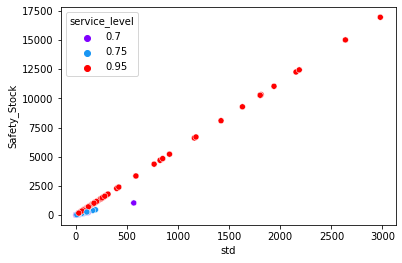

In [ ]:
sns.scatterplot(data = all_df, x = "std", y = "Safety_Stock", hue = "service_level", palette = "rainbow")

Case 1: In this scenario we will consider both the variability in Customer Demand and the uncertainty in Lead Time

In [ ]:
lead_time = 12
sd_lead_time = 2

In [ ]:
reorder_lt_df = pd.DataFrame()
for i in range(final_df.shape[0]):
  df = pd.DataFrame(inv.reorderpoint_leadtime_variability(int(final_df.loc[i, "mean"]),
                        final_df.loc[i, "std"],lead_time,sd_lead_time,
                        final_df.loc[i, "service_level"]
                        ), index = [i])
  df["sku"] = final_df.loc[i, "skus"]
  reorder_lt_df = pd.concat([reorder_lt_df, df], axis = 0)
reorder_lt_df.head()

,demandleadtime,sigmadl,safteyfactor,reorder_point,sku
0,84,30.624552,0.674490,104.655946,DOORMAT UNION JACK GUNS AND ROSES
1,144,63.472580,1.644854,248.403104,3 STRIPEY MICE FELTCRAFT
2,396,63.204430,1.644854,499.962036,ANIMAL STICKERS
3,60,13.638182,0.524401,67.151869,BLACK PIRATE TREASURE CHEST
4,72,16.309506,0.524401,80.552714,BROWN PIRATE TREASURE CHEST


In [ ]:
reorder_lt_df["Safety_Stock"] = reorder_lt_df["reorder_point"] - reorder_lt_df["demandleadtime"]
first_column = reorder_lt_df.pop("sku")
reorder_lt_df.insert(0, "sku", first_column)
reorder_lt_df.sort_values("sku", inplace = True)
reorder_lt_df.head()

,sku,demandleadtime,sigmadl,safteyfactor,reorder_point,Safety_Stock
0,DOORMAT UNION JACK GUNS AND ROSES,84,30.624552,0.674490,104.655946,20.655946
1,3 STRIPEY MICE FELTCRAFT,144,63.472580,1.644854,248.403104,104.403104
2,ANIMAL STICKERS,396,63.204430,1.644854,499.962036,103.962036
3,BLACK PIRATE TREASURE CHEST,60,13.638182,0.524401,67.151869,7.151869
4,BROWN PIRATE TREASURE CHEST,72,16.309506,0.524401,80.552714,8.552714


In [ ]:
#Merging the entire data
all_lt_df = pd.merge( reorder_lt_df, final_df, how = "right", left_on = "sku", right_on = "skus")
all_lt_df.drop("skus", axis = 1, inplace = True)
all_lt_df.head()

,sku,demandleadtime,sigmadl,safteyfactor,reorder_point,Safety_Stock,service_level,mean,std,total_sales,total_revenue
0,DOORMAT UNION JACK GUNS AND ROSES,84,30.624552,0.674490,104.655946,20.655946,0.75,7.550000,8.375874,151,971.25
1,3 STRIPEY MICE FELTCRAFT,144,63.472580,1.644854,248.403104,104.403104,0.95,12.724138,17.651177,369,693.75
2,ANIMAL STICKERS,396,63.204430,1.644854,499.962036,103.962036,0.95,33.700000,12.311241,337,70.77
3,BLACK PIRATE TREASURE CHEST,60,13.638182,0.524401,67.151869,7.151869,0.70,5.000000,3.391165,45,74.25
4,BROWN PIRATE TREASURE CHEST,72,16.309506,0.524401,80.552714,8.552714,0.70,6.000000,4.000000,36,59.40


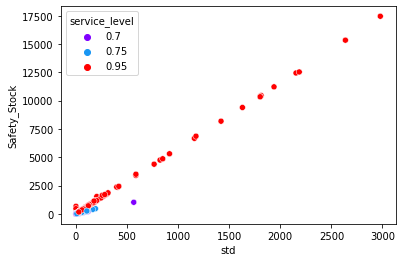

In [ ]:
sns.scatterplot(data = all_lt_df, x = "std", y = "Safety_Stock", hue = "service_level", palette = "rainbow")